## Import Libraries and Data

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

import warnings
warnings.filterwarnings('ignore')

In [11]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [14]:
emp_train_test=  pd.read_csv('/content/drive/MyDrive/employee_train_dataset_main.csv')
emp_pred=  pd.read_csv('/content/drive/MyDrive/employee_test_dataset_main.csv')

In [15]:
print(emp_train_test.shape)
print(emp_pred.shape)

(50000, 28)
(20000, 27)


## Data Preprocessing

### Remove unnecessary columns

In [16]:
emp_train_test.drop(columns=['S.No','comments'],inplace=True)
emp_pred.drop(columns=['S.No','comments'],inplace=True)

In [17]:
print(emp_train_test.shape)
print(emp_pred.shape)

(50000, 26)
(20000, 25)


### Change Datatype

In [18]:
emp_train_test['Timestamp']=pd.to_datetime(emp_train_test['Timestamp'],format="%d-%m-%Y %H:%M")
emp_pred['Timestamp']=pd.to_datetime(emp_pred['Timestamp'],format="%d-%m-%Y %H:%M")

### Data Transformation

In [19]:
clm_train_test=['Gender','Country', 'state', 'self_employed', 'family_history', 'treatment', 'work_interfere', 'no_employees', 'remote_work', 'tech_company', 'benefits',
 'care_options', 'wellness_program','seek_help', 'anonymity', 'leave', 'mental_health_consequence', 'phys_health_consequence', 'coworkers', 'supervisor',
 'mental_health_interview', 'phys_health_interview', 'mental_vs_physical', 'obs_consequence']

clm_pred=['Gender','Country', 'state', 'self_employed', 'family_history', 'work_interfere', 'no_employees', 'remote_work', 'tech_company', 'benefits',
 'care_options', 'wellness_program','seek_help', 'anonymity', 'leave', 'mental_health_consequence', 'phys_health_consequence', 'coworkers', 'supervisor',
 'mental_health_interview', 'phys_health_interview', 'mental_vs_physical', 'obs_consequence']

In [20]:
replace_gender_train_test = {
    'M': 'Male','Male': 'Male','male': 'Male','m': 'Male','Male-ish': 'Male','maile': 'Male','Mal': 'Male','Male (CIS)': 'Male','Male ': 'Male','Man': 'Male',
    'Mail': 'Male','msle': 'Male','Malr': 'Male','Guy (-ish) ^_^': 'Male','cis male': 'Male','male leaning androgynous': 'Male', 'Cis Male': 'Male',
    'Make': 'Male',

    'Female': 'Female','female': 'Female','Cis Female': 'Female','F': 'Female','Femake': 'Female','f': 'Female','woman': 'Female','Woman': 'Female',
    'Female (cis)': 'Female','cis-female/femme': 'Female','Female (trans)': 'Female', 'Trans-female': 'Female','Trans woman': 'Female','Female ':'Female',

    'Nah': 'Other','All': 'Other','Enby': 'Other','fluid': 'Other','Genderqueer': 'Other','queer/she/they': 'Other','non-binary': 'Other',
    'something kinda male?': 'Other','queer': 'Other','Androgyne': 'Other','Agender': 'Other','Neuter': 'Other','A little about you': 'Other'
}

replace_gender_pred = {'Male': 'Male','female': 'Female','Female': 'Female','M': 'Male','male': 'Male','Male ': 'Male','m': 'Male',
    'p': 'Other', 'F': 'Female','Woman': 'Female','femail': 'Female','Cis Man': 'Male',
    'ostensibly male, unsure what that really means': 'Male',  'f': 'Female'
}


emp_train_test['Gender'] = emp_train_test['Gender'].replace(replace_gender_train_test)
emp_pred['Gender'] = emp_pred['Gender'].replace(replace_gender_pred)

print(emp_train_test['Gender'].value_counts())
print('\n')
print(emp_pred['Gender'].value_counts())


Gender
Male      39616
Female     9752
Other       632
Name: count, dtype: int64


Gender
Male      15620
Female     4285
Other        95
Name: count, dtype: int64


In [21]:
emp_train_test['no_employees']=emp_train_test['no_employees'].replace(
                                                   {'25-Jun':np.nan,
                                                    '05-Jan':np.nan,
                                                    'More than 1000':'>1000'})
emp_pred['no_employees']=emp_pred['no_employees'].replace(
                                                   {'25-Jun':np.nan,
                                                    '05-Jan':np.nan,
                                                    'More than 1000':'>1000'})

In [22]:
for i in clm_train_test:
  print(i,':',emp_train_test[i].unique() )
  print('\n')

Gender : ['Female' 'Male' 'Other']


Country : ['United States' 'Canada' 'United Kingdom' 'Bulgaria' 'France' 'Portugal'
 'Netherlands' 'Switzerland' 'Poland' 'Australia' 'Germany' 'Russia'
 'Mexico' 'Brazil' 'Slovenia' 'Costa Rica' 'Austria' 'Ireland' 'India'
 'South Africa' 'Italy' 'Sweden' 'Colombia' 'Latvia' 'Romania' 'Belgium'
 'New Zealand' 'Zimbabwe' 'Spain' 'Finland' 'Uruguay' 'Israel'
 'Bosnia and Herzegovina' 'Hungary' 'Singapore' 'Japan' 'Nigeria'
 'Croatia' 'Norway' 'Thailand' 'Denmark' 'Bahamas, The']


state : ['IL' 'IN' nan 'TX' 'TN' 'MI' 'OH' 'CA' 'CT' 'MD' 'NY' 'NC' 'MA' 'IA' 'PA'
 'WA' 'WI' 'UT' 'NM' 'OR' 'FL' 'MN' 'MO' 'AZ' 'CO' 'GA' 'DC' 'NE' 'WV'
 'OK' 'KS' 'VA' 'NH' 'KY' 'AL' 'NV' 'NJ' 'SC' 'VT' 'SD' 'ID' 'MS' 'RI'
 'WY' 'LA' 'ME']


self_employed : [nan 'Yes' 'No']


family_history : ['No' 'Yes']


treatment : ['Yes' 'No']


work_interfere : ['Often' 'Rarely' 'Never' 'Sometimes' nan]


no_employees : [nan '>1000' '26-100' '100-500' '500-1000']


remote_work : ['N

In [23]:
for i in clm_pred:
  print(i,":",emp_pred[i].unique() )
  print('\n')

Gender : ['Male' 'Female' 'Other']


Country : ['United Kingdom' 'United States' 'Switzerland' 'Canada' 'Germany'
 'South Africa' 'Greece' 'Netherlands' 'France' 'Australia' 'India'
 'Croatia' 'New Zealand' 'Moldova' 'Sweden' 'Belgium' 'Israel' 'Singapore'
 'Poland' 'Colombia' 'Georgia' 'China' 'Bulgaria' 'Italy' 'Ireland'
 'Brazil' 'Czech Republic' 'Philippines' 'Finland']


state : [nan 'WA' 'IL' 'FL' 'TN' 'CA' 'OR' 'NJ' 'UT' 'PA' 'IN' 'OH' 'VA' 'TX' 'AL'
 'WI' 'NY' 'SC' 'MN' 'VT' 'MI' 'NC' 'OK' 'MD']


self_employed : ['Yes' 'No']


family_history : ['Yes' 'No']


work_interfere : ['Sometimes' 'Often' 'Never' 'Rarely' nan]


no_employees : [nan '>1000' '26-100' '500-1000' '100-500']


remote_work : ['Yes' 'No']


tech_company : ['Yes' 'No']


benefits : ['No' 'Yes' "Don't know" nan]


care_options : ['Yes' 'No' 'Not sure']


wellness_program : ['Yes' 'No' "Don't know" nan]


seek_help : ['Yes' 'No' "Don't know"]


anonymity : ['Yes' "Don't know" 'No']


leave : ['Somewhat difficult'

### Handle Null values

In [24]:
def null_val(dt):
  n=dt.isna().sum()
  n=n[n>0]
  nl=pd.DataFrame()
  nl['Feature']=n.index
  nl['Null_count']=n.values
  nl['%_Null']=nl['Null_count']/dt.shape[0]*100
  return nl

In [25]:
null_val(emp_train_test)

,Feature,Null_count,%_Null
0,state,19714,39.428
1,self_employed,882,1.764
2,work_interfere,11246,22.492
3,no_employees,18017,36.034
4,benefits,607,1.214
5,wellness_program,194,0.388
6,leave,169,0.338


In [26]:
null_val(emp_pred)

,Feature,Null_count,%_Null
0,state,9797,48.985
1,work_interfere,2663,13.315
2,no_employees,6955,34.775
3,benefits,286,1.430
4,wellness_program,190,0.950
5,leave,476,2.380


In [27]:
emp_train_test1=emp_train_test.copy()
emp_pred1=emp_pred.copy()

In [28]:
emp_train_test1['state']=emp_train_test1['state'].fillna('Other State')
emp_pred1['state']=emp_pred1['state'].fillna('Other State')

In [29]:
emp_train_test1['work_interfere']=emp_train_test1['work_interfere'].fillna('Other')
emp_pred1['work_interfere']=emp_pred1['work_interfere'].fillna('Other')

In [30]:
emp_train_test1['no_employees']=emp_train_test1['no_employees'].fillna(emp_train_test1['no_employees'].mode()[0])
emp_pred1['no_employees']=emp_pred1['no_employees'].fillna(emp_train_test1['no_employees'].mode()[0])

In [31]:
emp_train_test1['self_employed']=emp_train_test1['self_employed'].fillna(emp_train_test1['self_employed'].mode()[0])

In [32]:
emp_train_test1['benefits']=emp_train_test1['benefits'].fillna(emp_train_test1['benefits'].mode()[0])
emp_pred1['benefits']=emp_pred1['benefits'].fillna(emp_train_test1['benefits'].mode()[0])

In [33]:
emp_train_test1['wellness_program']=emp_train_test1['wellness_program'].fillna(emp_train_test1['wellness_program'].mode()[0])
emp_pred1['wellness_program']=emp_pred1['wellness_program'].fillna(emp_train_test1['wellness_program'].mode()[0])

In [34]:
emp_train_test1['leave']=emp_train_test1['leave'].fillna(emp_train_test1['leave'].mode()[0])
emp_pred1['leave']=emp_pred1['leave'].fillna(emp_train_test1['leave'].mode()[0])

In [35]:
null_val(emp_train_test1)

,Feature,Null_count,%_Null


In [36]:
null_val(emp_pred1)

,Feature,Null_count,%_Null


In [37]:
emp_pred1.dropna(inplace=True)

### Handle Duplicates

In [38]:
emp_train_test1.duplicated().sum()
emp_train_test1.drop_duplicates(inplace=True)

In [39]:
emp_pred1.duplicated().sum()
emp_pred1.drop_duplicates(inplace=True)

### Feature Extraction and Adding

In [40]:
emp_train_test1.rename(columns={'Timestamp':'Date_Time'},inplace=True)
emp_pred1.rename(columns={'Timestamp':'Date_Time'},inplace=True)

In [41]:
emp_train_test1['Year']=emp_train_test1['Date_Time'].dt.year
emp_train_test1['Qtr']=emp_train_test1['Date_Time'].dt.quarter
emp_train_test1['Month']=emp_train_test1['Date_Time'].dt.month
emp_train_test1['Week_Day']=emp_train_test1['Date_Time'].dt.dayofweek
emp_train_test1['Hour']=emp_train_test1['Date_Time'].dt.hour
emp_train_test1['Min']=emp_train_test1['Date_Time'].dt.minute

In [42]:
emp_pred1['Year']=emp_pred1['Date_Time'].dt.year
emp_pred1['Qtr']=emp_pred1['Date_Time'].dt.quarter
emp_pred1['Month']=emp_pred1['Date_Time'].dt.month
emp_pred1['Week_Day']=emp_pred1['Date_Time'].dt.dayofweek
emp_pred1['Hour']=emp_pred1['Date_Time'].dt.hour
emp_pred1['Min']=emp_pred1['Date_Time'].dt.minute

In [43]:
emp_train_test1['IsWeekend']=np.where(emp_train_test1['Week_Day'].isin([5,6]) ,1,0)
emp_pred1['IsWeekend']=np.where(emp_pred1['Week_Day'].isin([5,6]),1,0)

In [44]:
emp_train_test1['Hr_Part']=np.where(emp_train_test1['Hour'].between(0,5),0,
                                (np.where(emp_train_test1['Hour'].between(6,11),1,
                                (np.where(emp_train_test1['Hour'].between(12,17),2,3)))))

emp_pred1['Hr_Part']=np.where(emp_pred1['Hour'].between(0,5),0,
                                (np.where(emp_pred1['Hour'].between(6,11),1,
                                (np.where(emp_pred1['Hour'].between(12,17),2,3)))))


In [45]:
print(emp_train_test1.shape)
print(emp_pred1.shape)

(49997, 34)
(19998, 33)


## EDA

### Univariate

In [46]:
clm_train_test=['Gender', 'Country', 'state', 'self_employed',
       'family_history', 'treatment', 'work_interfere', 'no_employees',
       'remote_work', 'tech_company', 'benefits', 'care_options',
       'wellness_program', 'seek_help', 'anonymity', 'leave',
       'mental_health_consequence', 'phys_health_consequence', 'coworkers',
       'supervisor', 'mental_health_interview', 'phys_health_interview',
       'mental_vs_physical', 'obs_consequence']

clm_pred=['Gender', 'Country', 'state', 'self_employed',
       'family_history',  'work_interfere', 'no_employees',
       'remote_work', 'tech_company', 'benefits', 'care_options',
       'wellness_program', 'seek_help', 'anonymity', 'leave',
       'mental_health_consequence', 'phys_health_consequence', 'coworkers',
       'supervisor', 'mental_health_interview', 'phys_health_interview',
       'mental_vs_physical', 'obs_consequence']

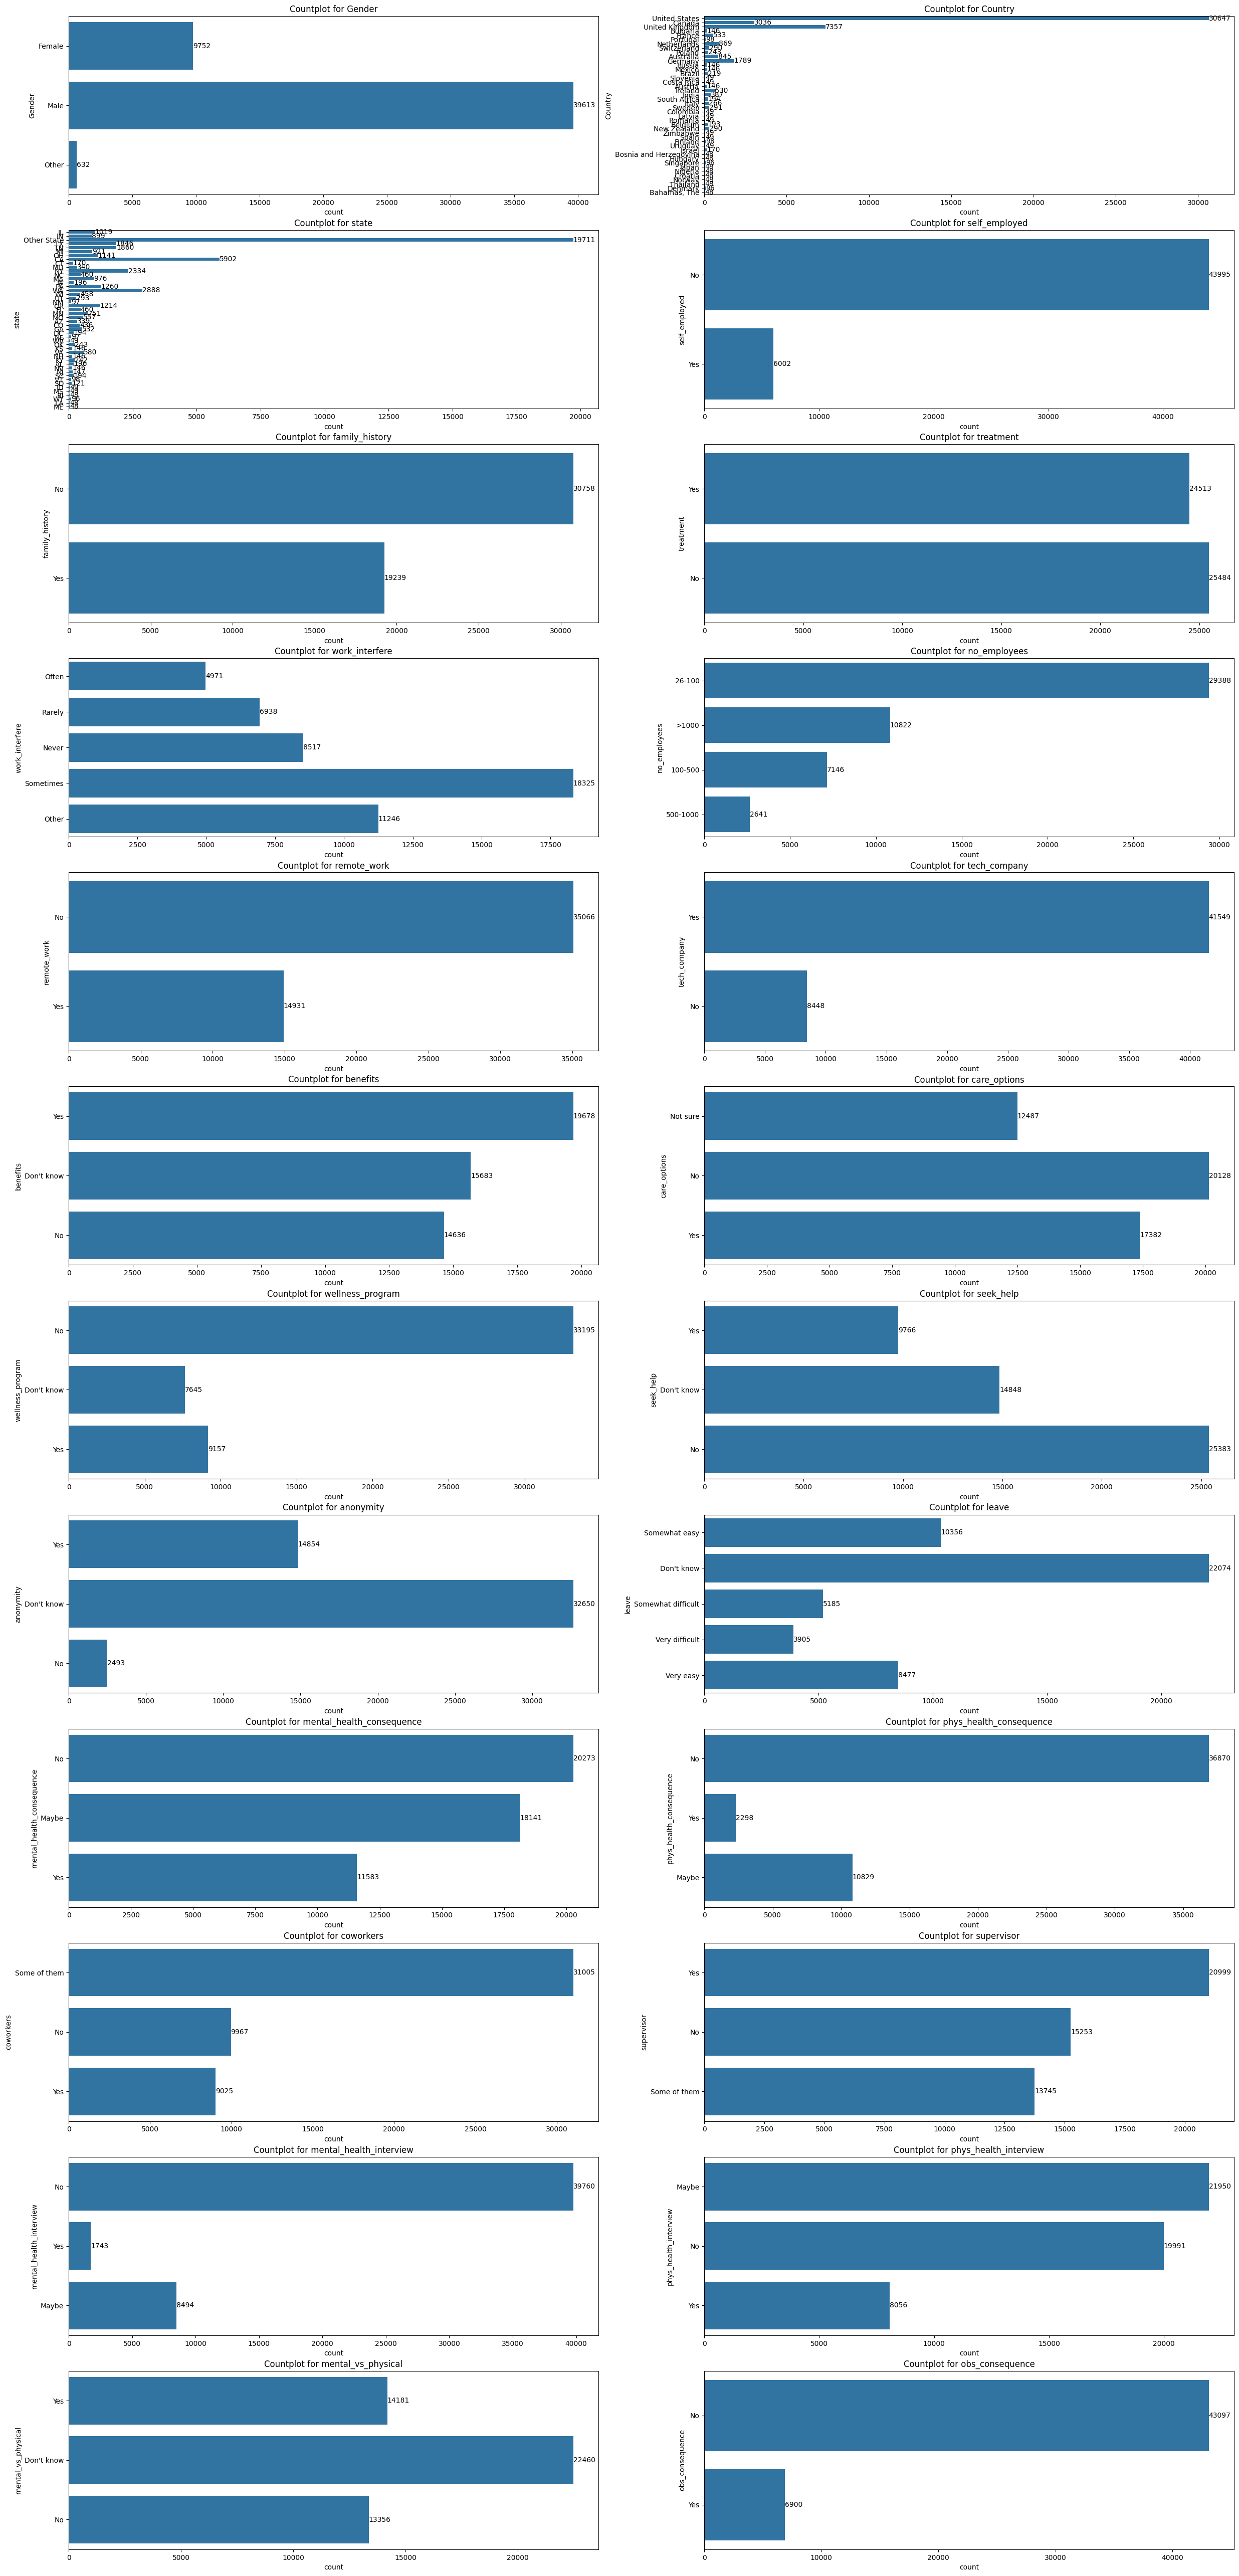

In [47]:
plt.figure(figsize=(30,110))
for i in range(len(clm_train_test)):
  plt.subplot(20,2,i+1)
  ax=sb.countplot(emp_train_test1[clm_train_test[i]])
  ax.bar_label(ax.containers[0])
  plt.title(f'Countplot for {clm_train_test[i]}')


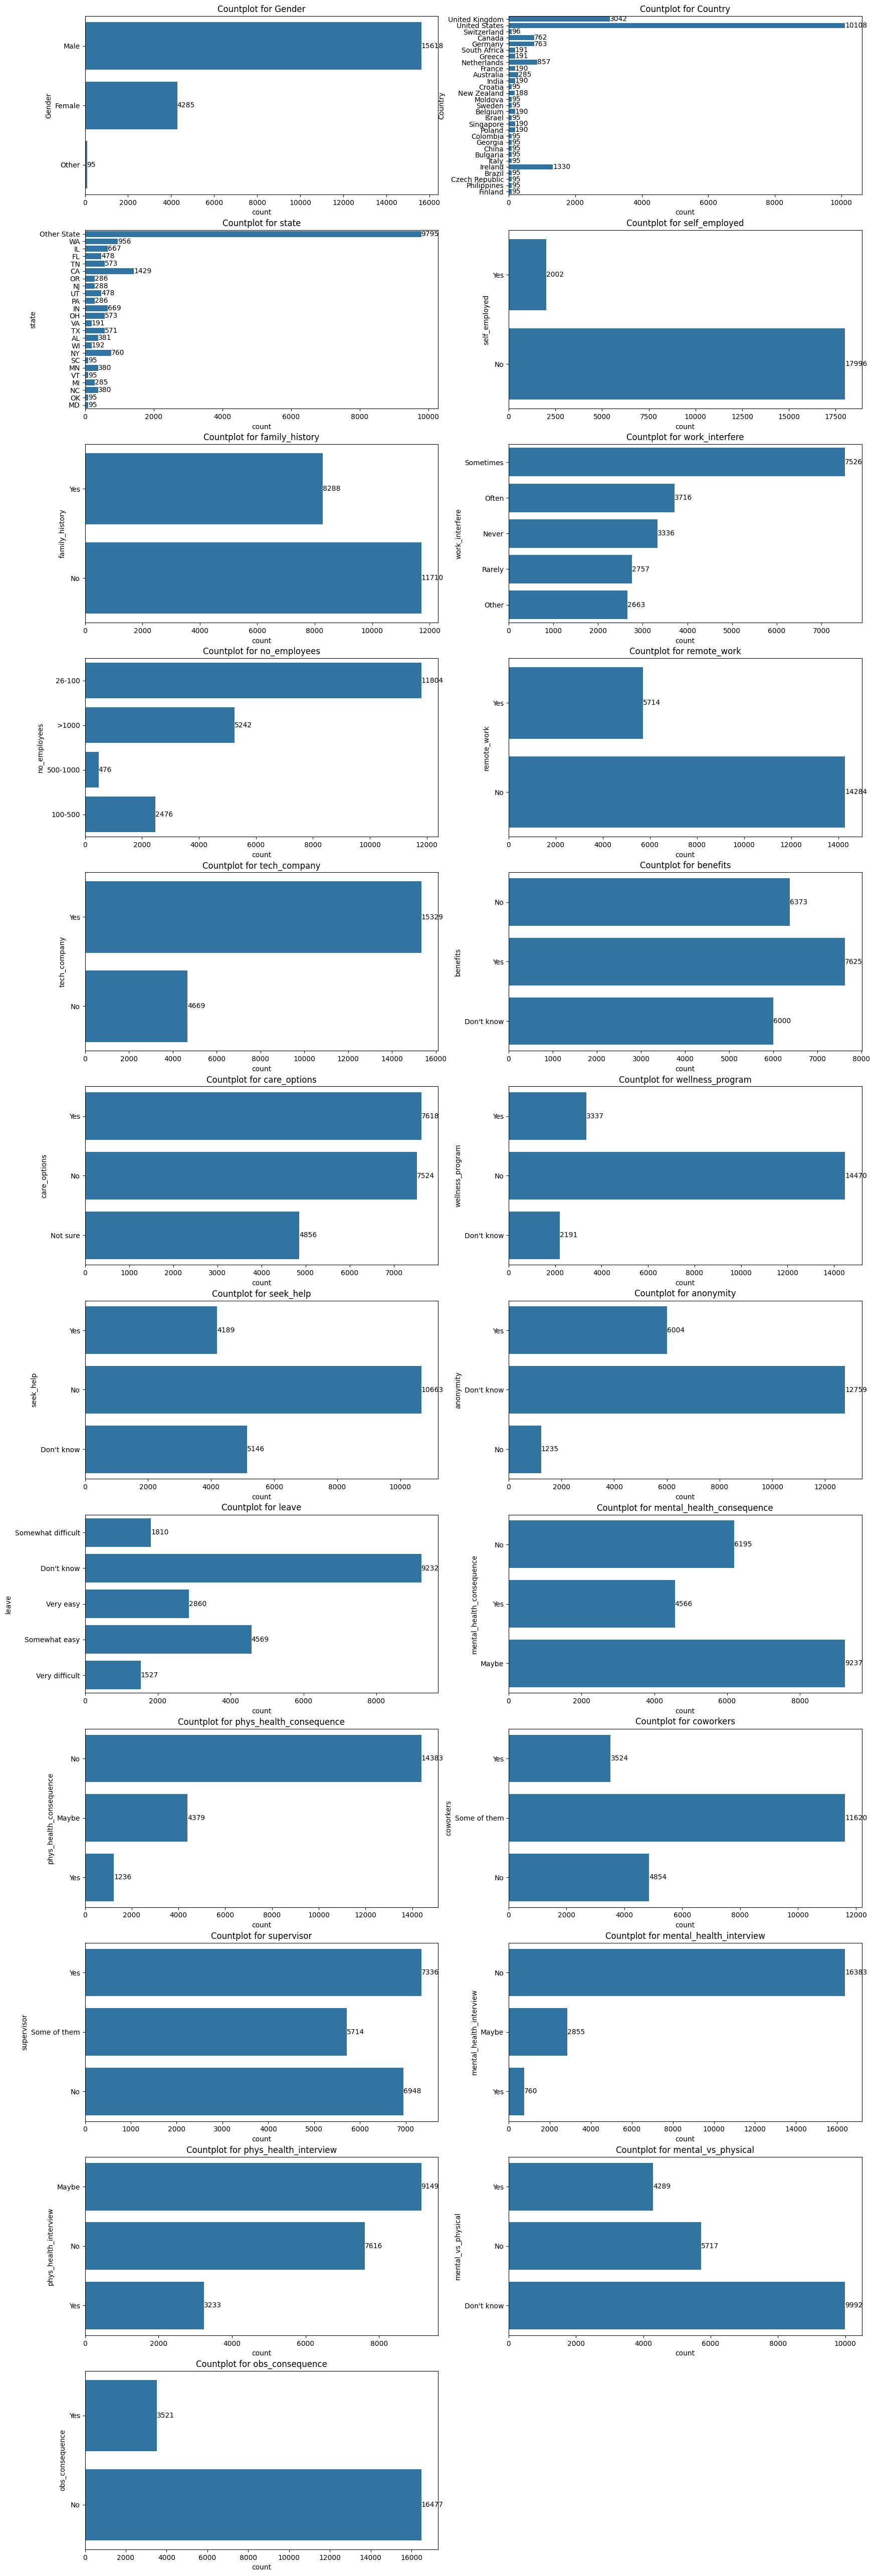

In [48]:
plt.figure(figsize=(20,110))
for i in range(len(clm_pred)):
  plt.subplot(20,2,i+1)
  ax=sb.countplot(emp_pred1[clm_pred[i]])
  ax.bar_label(ax.containers[0])
  plt.title(f'Countplot for {clm_pred[i]}')

## Encoding

In [49]:
from sklearn.preprocessing import LabelEncoder

In [50]:
clm_train_test_enc=['Country', 'state', 'treatment']
clm_pred_enc=['Country', 'state']

for i in clm_train_test_enc:
  le=LabelEncoder()
  emp_train_test1[i]=le.fit_transform(emp_train_test1[i])

for i in clm_pred_enc:
  le=LabelEncoder()
  emp_pred1[i]=le.fit_transform(emp_pred1[i])

In [51]:
clm_dm=emp_train_test1.dtypes[emp_train_test1.dtypes=='object'].index

emp_train_test_dm=pd.get_dummies(data=emp_train_test1,columns=clm_dm,drop_first=True,dtype=int)
emp_pred_dm=pd.get_dummies(data=emp_pred1,columns=clm_dm,drop_first=True,dtype=int)

## Droping 'Date_Time'  Column in pred

In [52]:
emp_pred_dm.drop(columns=['Date_Time'],inplace=True)

## Select x and y (train data), x(test data)

In [69]:
x=emp_train_test_dm.drop(columns=['Date_Time','treatment'])
y=emp_train_test_dm['treatment']

print(x.shape)
print(y.shape)

(49997, 53)
(49997,)


## Train Test Splitting

In [70]:
from sklearn.model_selection import train_test_split

In [71]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.3,random_state=42)

In [72]:
print(xtrain.shape)
print(ytrain.shape)
print(xtest.shape)
print(ytest.shape)

(34997, 53)
(34997,)
(15000, 53)
(15000,)


## Standard Scaling

In [81]:
from sklearn.preprocessing import StandardScaler

In [82]:
ss=StandardScaler()
xtrain=pd.DataFrame(ss.fit_transform(xtrain),columns=xtrain.columns)
xtest=pd.DataFrame(ss.transform(xtest),columns=xtest.columns)

## Evaluation Matrix

In [83]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,f1_score

In [84]:
def Matrics(y_test,y_pred):
  print('Confusion Matrix: \n',confusion_matrix(y_test,y_pred))
  print('\n')
  print('Classification Report: \n',classification_report(y_test,y_pred))

In [85]:
def Score(y_test,y_pred):
  print('Accuracy Score:',accuracy_score(y_test,y_pred))
  print('F1 Score:',f1_score(y_test,y_pred))

## Logistic Regression

In [86]:
from sklearn.linear_model import LogisticRegression

In [87]:
lg=LogisticRegression(max_iter=100000)
lg.fit(xtrain,ytrain)

LogisticRegression(max_iter=100000)

In [88]:
y_pd_lg=lg.predict(xtest)

In [89]:
Matrics(ytest,y_pd_lg)

Confusion Matrix: 
 [[6142 1566]
 [ 690 6602]]


Classification Report: 
               precision    recall  f1-score   support

           0       0.90      0.80      0.84      7708
           1       0.81      0.91      0.85      7292

    accuracy                           0.85     15000
   macro avg       0.85      0.85      0.85     15000
weighted avg       0.85      0.85      0.85     15000



In [90]:
Score(ytest,y_pd_lg)

Accuracy Score: 0.8496
F1 Score: 0.8540750323415265


In [91]:
print('Train Score:',lg.score(xtrain,ytrain))
print('Test Score:',lg.score(xtest,ytest))

Train Score: 0.8465011286681715
Test Score: 0.8496


In [92]:
# Finding Best Threshold

In [93]:
from sklearn.metrics import roc_curve,roc_auc_score

In [94]:
y_pd_lg_prob=lg.predict_proba(xtest)[:,1]

In [95]:
tps,fps,thres=roc_curve(ytest,y_pd_lg_prob)
roc=roc_auc_score(ytest,y_pd_lg_prob)

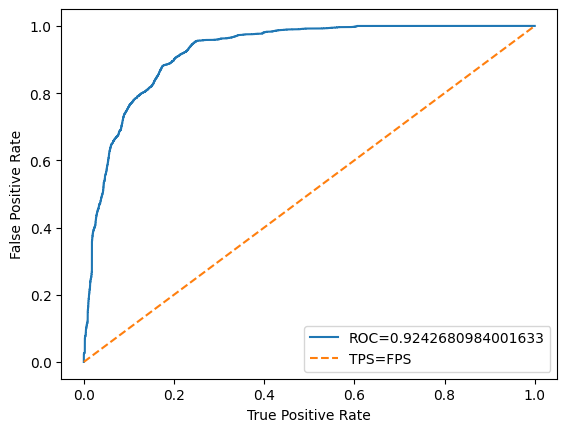

In [96]:
plt.plot(tps,fps,label=f'ROC={roc}')
plt.plot([0,1],[0,1],linestyle='--',label='TPS=FPS')
plt.xlabel('True Positive Rate')
plt.ylabel('False Positive Rate')
plt.legend()
plt.show()

In [97]:
best_thres=thres[np.argmax(tps*(1-fps))]
y_pd_lg_final=np.where(y_pd_lg_prob>best_thres,1,0)

In [98]:
## Checking score again

In [99]:
Matrics(ytest,y_pd_lg_final)

Confusion Matrix: 
 [[6550 1158]
 [1309 5983]]


Classification Report: 
               precision    recall  f1-score   support

           0       0.83      0.85      0.84      7708
           1       0.84      0.82      0.83      7292

    accuracy                           0.84     15000
   macro avg       0.84      0.84      0.84     15000
weighted avg       0.84      0.84      0.84     15000



## Decision Tree

In [100]:
from sklearn.tree import DecisionTreeClassifier

In [101]:
dt=DecisionTreeClassifier()

In [102]:
## Hyperparametric Tuning using RandomizedSearchCV

In [103]:
from sklearn.model_selection import RandomizedSearchCV

In [104]:
param={'criterion':['gini','entropy'],
          'max_depth':list(range(5,12)),
          'min_samples_split':list(range(2,12)) }

In [105]:
gs_dt=RandomizedSearchCV(dt,param_distributions=param,scoring='accuracy',n_iter=40)
gs_dt.fit(xtrain,ytrain)

RandomizedSearchCV(estimator=DecisionTreeClassifier(), n_iter=40,
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': [5, 6, 7, 8, 9, 10, 11],
                                        'min_samples_split': [2, 3, 4, 5, 6, 7,
                                                              8, 9, 10, 11]},
                   scoring='accuracy')

In [106]:
## Using Best Parameter

In [107]:
dt_f=DecisionTreeClassifier(**gs_dt.best_params_)
dt_f.fit(xtrain,ytrain)

DecisionTreeClassifier(max_depth=11, min_samples_split=8)

In [108]:
y_pd_dt=dt_f.predict(xtest)

In [109]:
Matrics(ytest,y_pd_dt)

Confusion Matrix: 
 [[7476  232]
 [ 110 7182]]


Classification Report: 
               precision    recall  f1-score   support

           0       0.99      0.97      0.98      7708
           1       0.97      0.98      0.98      7292

    accuracy                           0.98     15000
   macro avg       0.98      0.98      0.98     15000
weighted avg       0.98      0.98      0.98     15000



In [110]:
Score(ytest,y_pd_dt)

Accuracy Score: 0.9772
F1 Score: 0.9767441860465116


In [111]:
print('Train Score:',dt_f.score(xtrain,ytrain))
print('Test Score:',dt_f.score(xtest,ytest))

Train Score: 0.9779123924907849
Test Score: 0.9772


In [112]:
## Plot tree and Export Text

In [113]:
from sklearn.tree import plot_tree, export_text

In [114]:
f_name=xtrain.columns.to_list()
c_name=[str(i) for i in  ytrain.unique()]

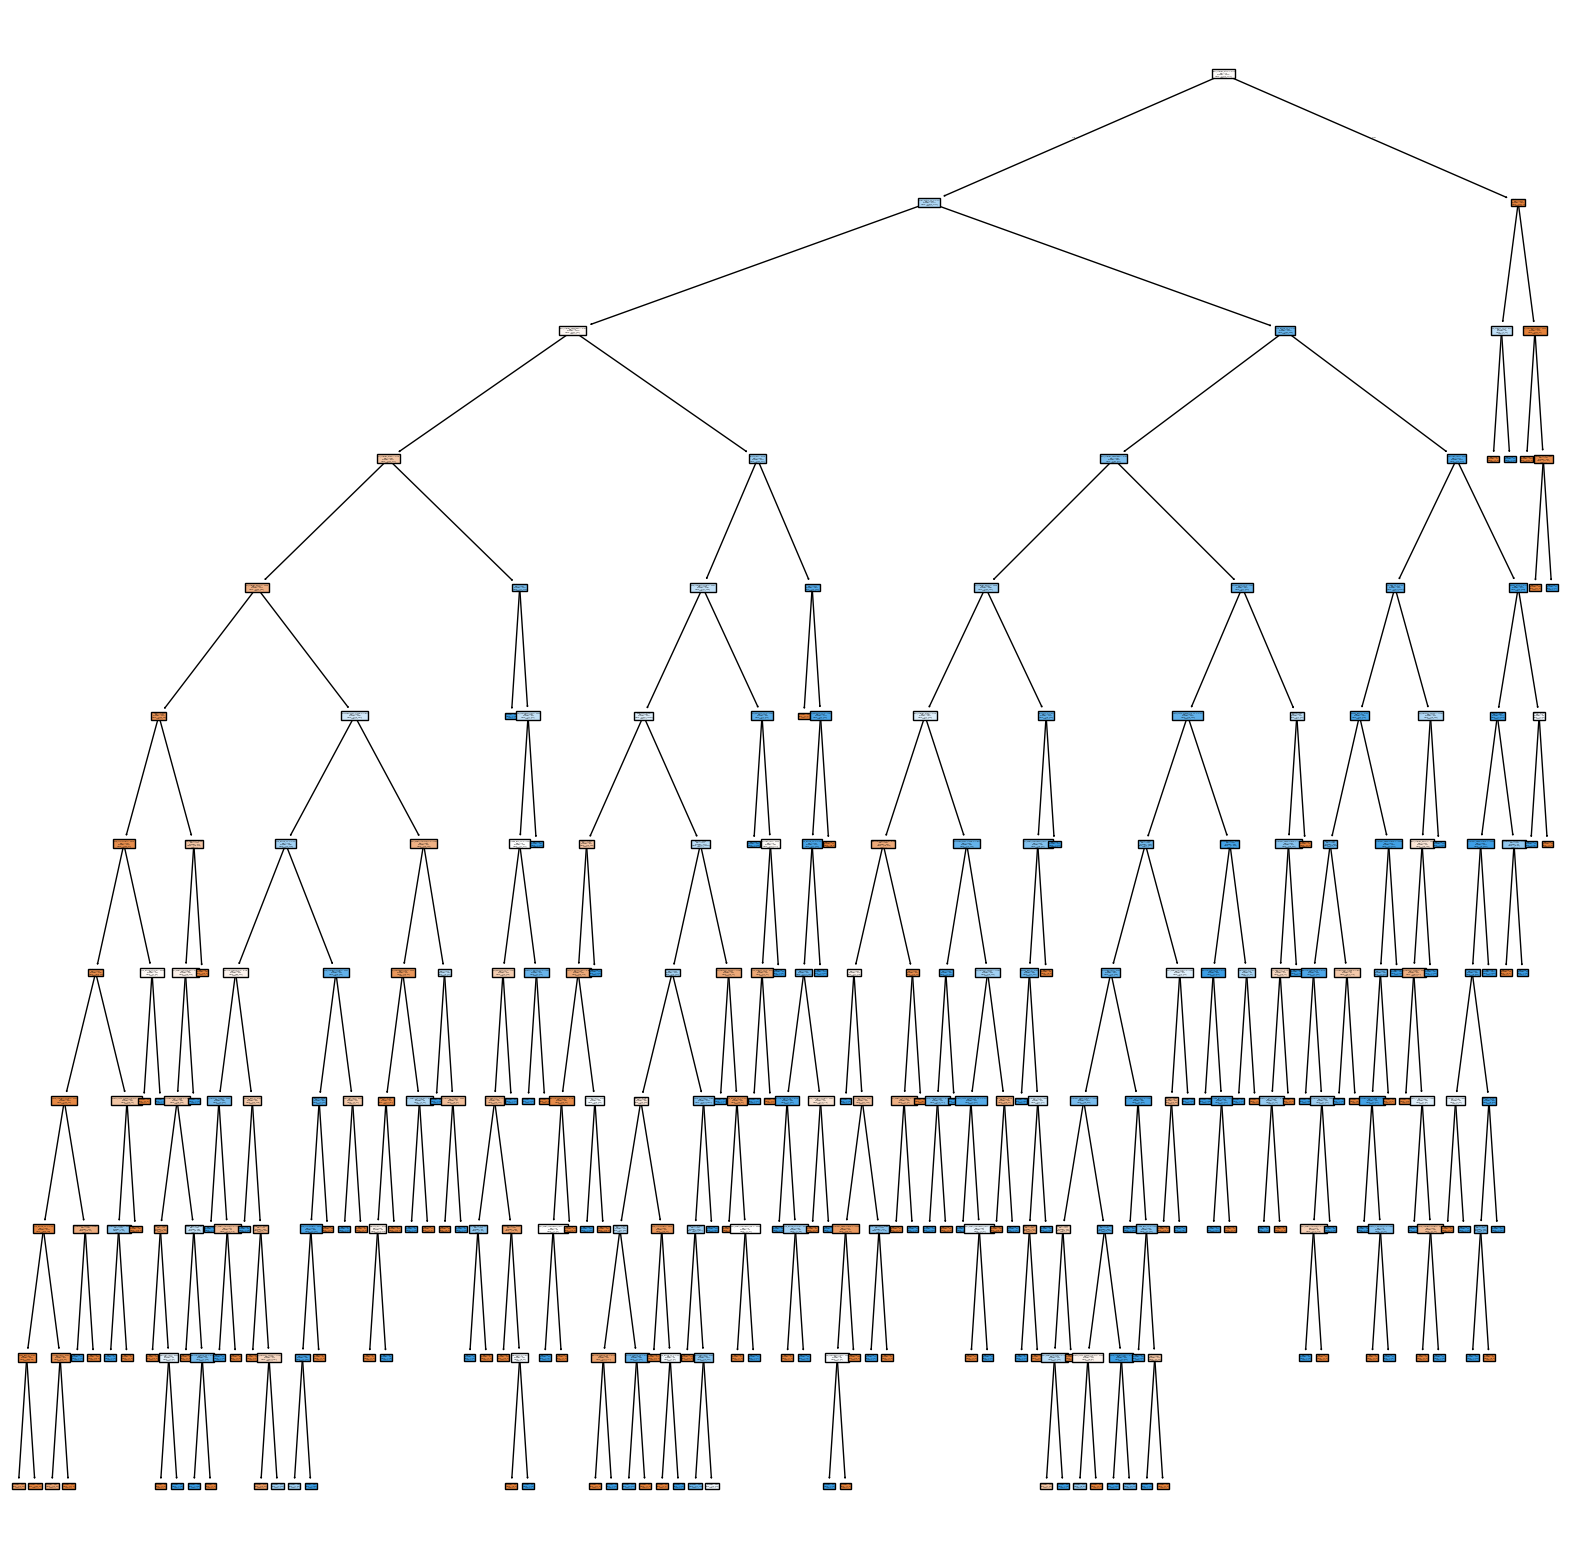

In [115]:
plt.figure(figsize=(20,20))
plot_tree(dt_f,feature_names=f_name,class_names=c_name,filled=True )
plt.show()

In [116]:
print(export_text(dt_f,feature_names=f_name,class_names=c_name))

|--- work_interfere_Other <= 0.66
|   |--- family_history_Yes <= 0.24
|   |   |--- work_interfere_Sometimes <= 0.28
|   |   |   |--- work_interfere_Often <= 1.33
|   |   |   |   |--- work_interfere_Rarely <= 1.04
|   |   |   |   |   |--- Age <= -0.03
|   |   |   |   |   |   |--- leave_Very difficult <= 1.58
|   |   |   |   |   |   |   |--- state <= 1.21
|   |   |   |   |   |   |   |   |--- leave_Somewhat difficult <= 1.30
|   |   |   |   |   |   |   |   |   |--- care_options_Yes <= 0.32
|   |   |   |   |   |   |   |   |   |   |--- Gender_Male <= -0.72
|   |   |   |   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |   |   |   |   |--- Gender_Male >  -0.72
|   |   |   |   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |   |   |   |--- care_options_Yes >  0.32
|   |   |   |   |   |   |   |   |   |   |--- supervisor_Yes <= 0.16
|   |   |   |   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |   |   |   |   |--- supervisor_Yes >  0.16


## Random Forest

In [117]:
from sklearn.ensemble import RandomForestClassifier

In [118]:
rf=RandomForestClassifier()

In [119]:
## Using Hyperparametric tuning Using Grid Search

In [120]:
param_rf={'n_estimators':[90,100,110],
          'criterion':['gini','entropy'],
          'max_depth':list(range(5,15)),
          'min_samples_split':list(range(5,15)) }

In [121]:
gs_rf=RandomizedSearchCV(rf,param_distributions=param_rf,scoring='accuracy',n_iter=50)
gs_rf.fit(xtrain,ytrain)

RandomizedSearchCV(estimator=RandomForestClassifier(), n_iter=50,
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': [5, 6, 7, 8, 9, 10, 11, 12,
                                                      13, 14],
                                        'min_samples_split': [5, 6, 7, 8, 9, 10,
                                                              11, 12, 13, 14],
                                        'n_estimators': [90, 100, 110]},
                   scoring='accuracy')

In [122]:
print('Best Parameter: ',gs_rf.best_params_)

Best Parameter:  {'n_estimators': 90, 'min_samples_split': 12, 'max_depth': 14, 'criterion': 'gini'}


In [123]:
## Using Best Parameter

In [124]:
rf_f=RandomForestClassifier(**gs_rf.best_params_)
rf_f.fit(xtrain,ytrain)

RandomForestClassifier(max_depth=14, min_samples_split=12, n_estimators=90)

In [125]:
y_pd_rf=rf_f.predict(xtest)

In [126]:
Matrics(ytest,y_pd_rf)

Confusion Matrix: 
 [[7708    0]
 [  16 7276]]


Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      7708
           1       1.00      1.00      1.00      7292

    accuracy                           1.00     15000
   macro avg       1.00      1.00      1.00     15000
weighted avg       1.00      1.00      1.00     15000



In [127]:
Score(ytest,y_pd_rf)

Accuracy Score: 0.9989333333333333
F1 Score: 0.9989017023613399


In [128]:
print('Train Score:',rf_f.score(xtrain,ytrain))
print('Test Score:',rf_f.score(xtest,ytest))

Train Score: 0.9989999142783668
Test Score: 0.9989333333333333


In [129]:
## Plot tree and Export Text (For a random tree , e.g. 40th tree)

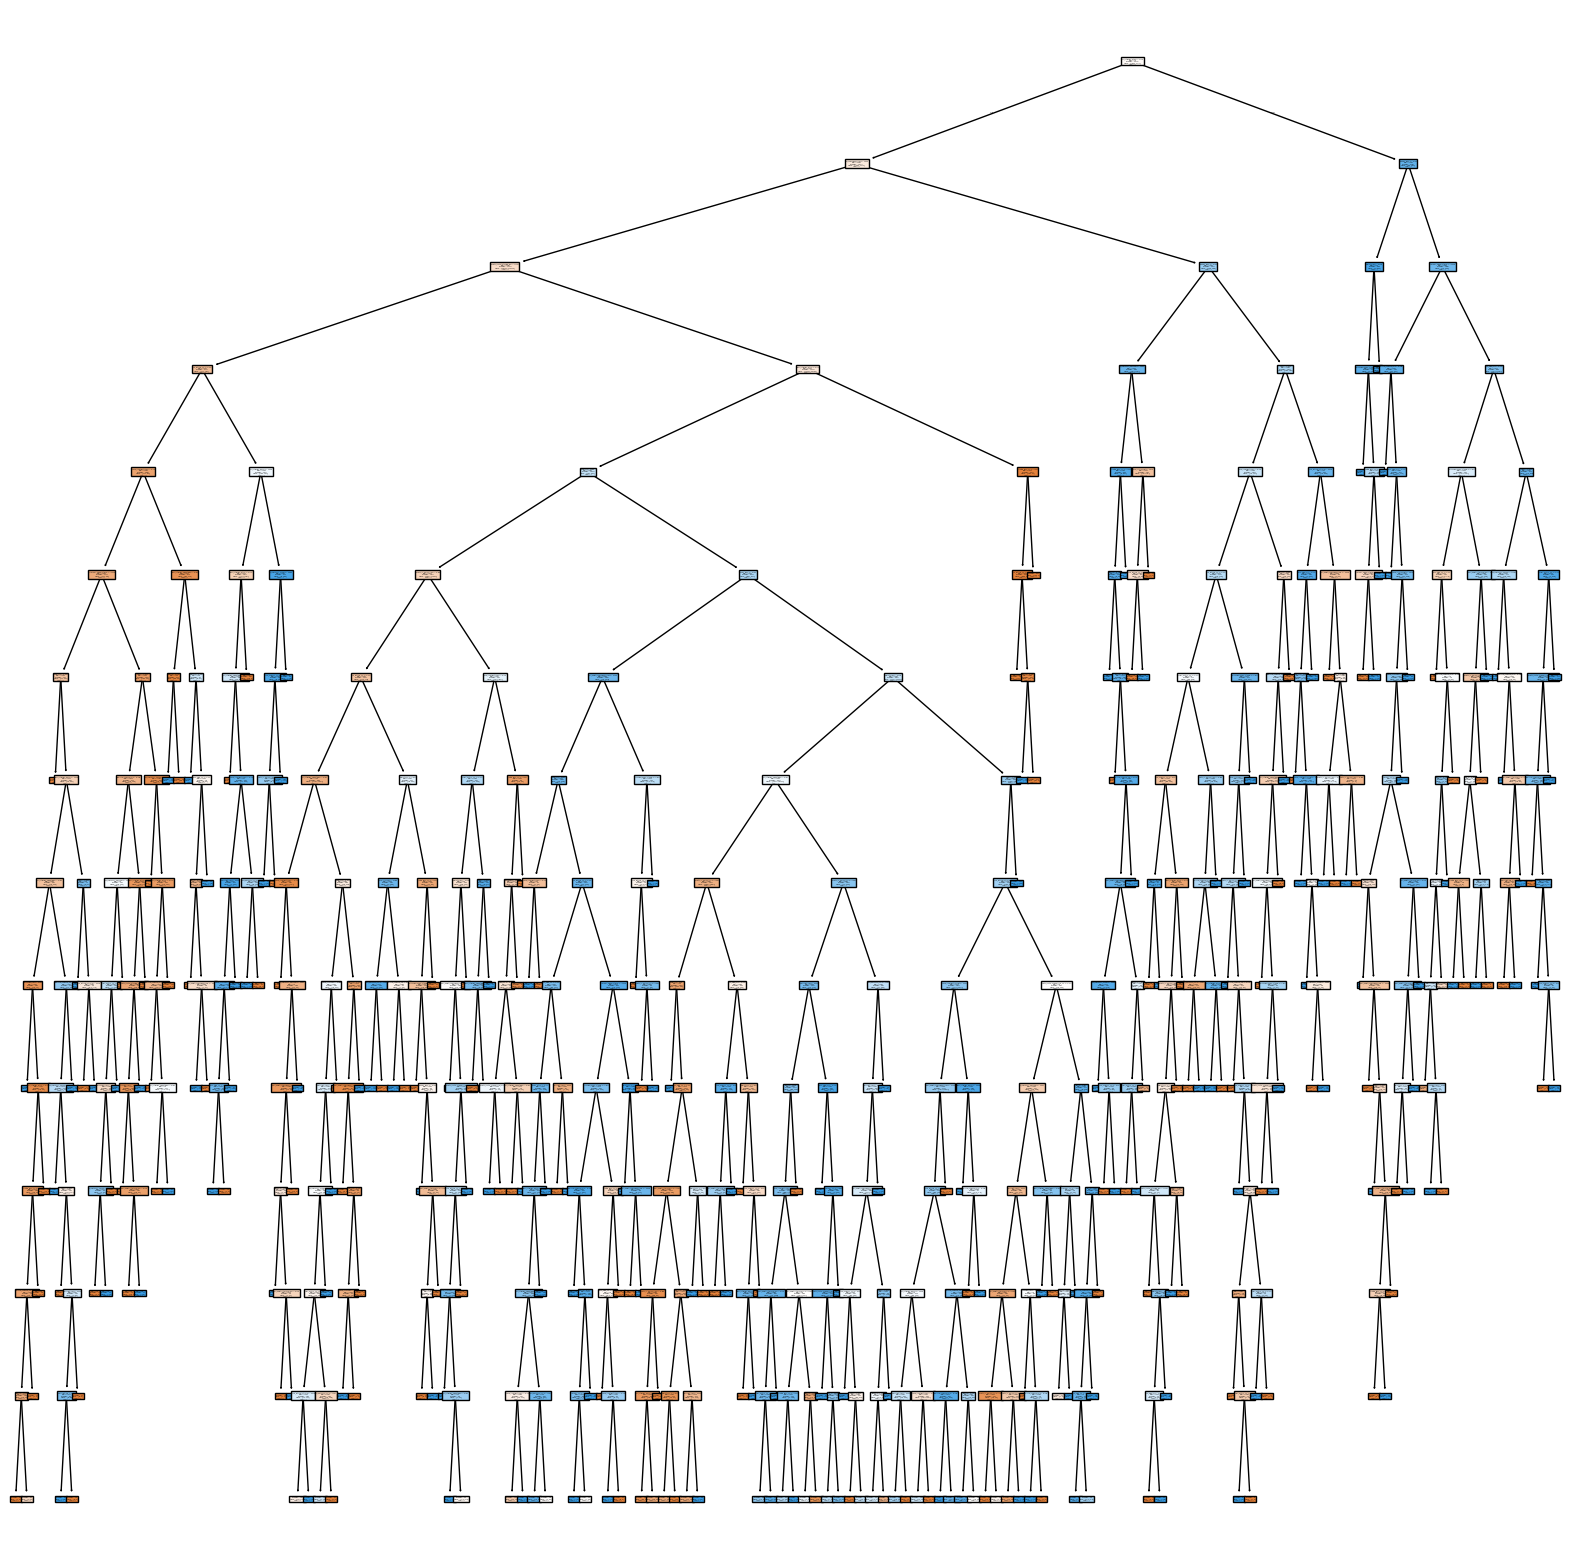

In [130]:
plt.figure(figsize=(20,20))
plot_tree(rf_f.estimators_[40],feature_names=f_name,class_names=c_name,filled=True )
plt.show()

In [131]:
print(export_text(rf_f.estimators_[40],feature_names=f_name,class_names=c_name))

|--- work_interfere_Often <= 1.33
|   |--- obs_consequence_Yes <= 1.04
|   |   |--- mental_health_interview_No <= -0.74
|   |   |   |--- care_options_Yes <= 0.32
|   |   |   |   |--- leave_Somewhat easy <= 0.73
|   |   |   |   |   |--- coworkers_Some of them <= -0.25
|   |   |   |   |   |   |--- Country <= -1.96
|   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |--- Country >  -1.96
|   |   |   |   |   |   |   |--- work_interfere_Rarely <= 1.04
|   |   |   |   |   |   |   |   |--- work_interfere_Sometimes <= 0.28
|   |   |   |   |   |   |   |   |   |--- supervisor_Yes <= 0.16
|   |   |   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |   |   |   |--- supervisor_Yes >  0.16
|   |   |   |   |   |   |   |   |   |   |--- work_interfere_Other <= 0.66
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 4
|   |   |   |   |   |   |   |   |   |   |--- work_interfere_Other >  0.66
|   |   |   |   |   |   |   |   |   |   |   |--- class: 0


## KNN Classifier

In [132]:
from sklearn.neighbors import KNeighborsClassifier

In [133]:
knn=KNeighborsClassifier()

In [134]:
## Finding Best Parameter

In [135]:
param_knn={'n_neighbors':list(range(31,43,2))}

In [136]:
gs_knn=RandomizedSearchCV(knn,param_distributions=param_knn,scoring='accuracy',n_iter=50)
gs_knn.fit(xtrain,ytrain)

RandomizedSearchCV(estimator=KNeighborsClassifier(), n_iter=50,
                   param_distributions={'n_neighbors': [31, 33, 35, 37, 39,
                                                        41]},
                   scoring='accuracy')

In [137]:
print("Best Parameter",gs_knn.best_params_)

Best Parameter {'n_neighbors': 31}


In [138]:
## Using best Parameter

In [139]:
knn_f=KNeighborsClassifier(**gs_knn.best_params_)
knn_f.fit(xtrain,ytrain)

KNeighborsClassifier(n_neighbors=31)

In [140]:
y_pd_knn=knn_f.predict(xtest)

In [142]:
Matrics(ytest,y_pd_knn)

Confusion Matrix: 
 [[7689   19]
 [   2 7290]]


Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      7708
           1       1.00      1.00      1.00      7292

    accuracy                           1.00     15000
   macro avg       1.00      1.00      1.00     15000
weighted avg       1.00      1.00      1.00     15000



In [143]:
Score(ytest,y_pd_knn)

Accuracy Score: 0.9986
F1 Score: 0.9985617423464146


In [144]:
print('Train Score:',knn_f.score(xtrain,ytrain))
print('Test Score:',knn_f.score(xtest,ytest))

Train Score: 0.9992285053004544
Test Score: 0.9986


## Adaboost

In [145]:
from sklearn.ensemble import AdaBoostClassifier

In [146]:
ada=AdaBoostClassifier()

In [147]:
## Finding Best Parameter

In [148]:
param_ada={'n_estimators':list(range(150,310,10)) }

In [149]:
gs_ada=RandomizedSearchCV(ada,param_distributions=param_ada,scoring='accuracy',n_iter=50)
gs_ada.fit(xtrain,ytrain)

RandomizedSearchCV(estimator=AdaBoostClassifier(), n_iter=50,
                   param_distributions={'n_estimators': [150, 160, 170, 180,
                                                         190, 200, 210, 220,
                                                         230, 240, 250, 260,
                                                         270, 280, 290, 300]},
                   scoring='accuracy')

In [150]:
print("Best Parameter",gs_ada.best_params_)

Best Parameter {'n_estimators': 290}


In [151]:
## Using best parameter

In [152]:
ada_f=AdaBoostClassifier(**gs_ada.best_params_)
ada_f.fit(xtrain,ytrain)

AdaBoostClassifier(n_estimators=290)

In [153]:
y_pd_ada=ada_f.predict(xtest)

In [154]:
Matrics(ytest,y_pd_ada)

Confusion Matrix: 
 [[6120 1588]
 [ 710 6582]]


Classification Report: 
               precision    recall  f1-score   support

           0       0.90      0.79      0.84      7708
           1       0.81      0.90      0.85      7292

    accuracy                           0.85     15000
   macro avg       0.85      0.85      0.85     15000
weighted avg       0.85      0.85      0.85     15000



In [155]:
Score(ytest,y_pd_ada)

Accuracy Score: 0.8468
F1 Score: 0.8513775708187815


In [156]:
print('Train Score:',ada_f.score(xtrain,ytrain))
print('Test Score:',ada_f.score(xtest,ytest))

Train Score: 0.8461868160128011
Test Score: 0.8468


## GradientBoost

In [157]:
from sklearn.ensemble import GradientBoostingClassifier

In [158]:
gb=GradientBoostingClassifier()

In [159]:
## Finding Best Parameter

In [160]:
param_gb={'n_estimators':list(range(80,200,10))}


In [161]:
gs_gb=RandomizedSearchCV(gb,param_distributions=param_gb,scoring='accuracy',n_iter=50)
gs_gb.fit(xtrain,ytrain)

RandomizedSearchCV(estimator=GradientBoostingClassifier(), n_iter=50,
                   param_distributions={'n_estimators': [80, 90, 100, 110, 120,
                                                         130, 140, 150, 160,
                                                         170, 180, 190]},
                   scoring='accuracy')

In [162]:
print("Best Parameter",gs_gb.best_params_)

Best Parameter {'n_estimators': 190}


In [163]:
## Using best parameter

In [164]:
gb_f=GradientBoostingClassifier(**gs_gb.best_params_)
gb_f.fit(xtrain,ytrain)

GradientBoostingClassifier(n_estimators=190)

In [165]:
y_pd_gb=gb_f.predict(xtest)

In [166]:
Matrics(ytest,y_pd_gb)

Confusion Matrix: 
 [[6843  865]
 [ 321 6971]]


Classification Report: 
               precision    recall  f1-score   support

           0       0.96      0.89      0.92      7708
           1       0.89      0.96      0.92      7292

    accuracy                           0.92     15000
   macro avg       0.92      0.92      0.92     15000
weighted avg       0.92      0.92      0.92     15000



In [167]:
Score(ytest,y_pd_gb)

Accuracy Score: 0.9209333333333334
F1 Score: 0.921602326811211


In [168]:
print('Train Score:',gb_f.score(xtrain,ytrain))
print('Test Score:',gb_f.score(xtest,ytest))

Train Score: 0.9217075749349944
Test Score: 0.9209333333333334


## XGBoost

In [169]:
from xgboost import XGBClassifier

In [170]:
xgb=XGBClassifier()

In [171]:
## Finding Best Parameter

In [172]:
param_xgb={'eta':np.arange(0.1,1),'gamma':np.arange(2.3,5,0.05),'reg_alpha':np.arange(0.55,3,0.05)}

In [188]:
gs_xgb=RandomizedSearchCV(xgb,param_distributions=param_xgb,scoring='accuracy',n_iter=50)
gs_xgb.fit(xtrain,ytrain)

RandomizedSearchCV(estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, device=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, feature_types=None,
                                           gamma=None, grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate=None...
       3.95, 4.  , 4.05, 4.1 , 4.15, 4.2 , 4.25, 4.3 , 4.35, 4.4 , 4.45,
       4.5 , 4.55, 4.6 , 4.65, 4.7 , 4.75, 4.8 , 4.85, 4.9 , 4.95]),
                                        'reg_alpha': array([0.55, 0.6 , 0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95, 1.  , 1.05,
       1.1 , 1.15, 1.2 , 1.25, 1.3 , 1.35, 1.4 , 1.45, 1.5 , 1.55, 1.6 ,
       1.65, 1.7 , 1.75, 1.8 , 1.85, 1.9 , 1.95, 2.  , 2.05, 2.1 , 2.15,
       2.2 , 2.25, 2.3 , 2.35, 2.4 , 2.45, 2.5 , 2.55, 2.6 , 2.65, 2.7 ,
       2.75, 2.8 , 2.85, 2.9 , 2.95])},
                   scoring='accuracy')

In [189]:
print("Best Parameter",gs_xgb.best_params_)

Best Parameter {'reg_alpha': np.float64(0.9000000000000004), 'gamma': np.float64(2.3), 'eta': np.float64(0.1)}


In [191]:
## Using best parameter

In [192]:
xgb_f=XGBClassifier(**gs_xgb.best_params_)
xgb_f.fit(xtrain,ytrain)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eta=np.float64(0.1), eval_metric=None,
              feature_types=None, gamma=np.float64(2.3), grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, ...)

In [193]:
y_pd_xgb=xgb_f.predict(xtest)

In [194]:
Matrics(ytest,y_pd_xgb)

Confusion Matrix: 
 [[7678   30]
 [  37 7255]]


Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      7708
           1       1.00      0.99      1.00      7292

    accuracy                           1.00     15000
   macro avg       1.00      1.00      1.00     15000
weighted avg       1.00      1.00      1.00     15000



In [195]:
Score(ytest,y_pd_xgb)

Accuracy Score: 0.9955333333333334
F1 Score: 0.9954037181861837


In [196]:
print('Train Score:',xgb_f.score(xtrain,ytrain))
print('Test Score:',xgb_f.score(xtest,ytest))

Train Score: 0.9963996914021201
Test Score: 0.9955333333333334


## Model Evaluation (Accuracy Score)

In [197]:
acc_scr=pd.DataFrame()

In [199]:
acc_scr['Model Name']=['Logistic Regression','Decision Tree','Random Forest','KNN','AdaBoost','GradientBoost','XGBoost']
acc_scr['Accuracy Score']=[accuracy_score(ytest,y_pd_lg_final),
                           accuracy_score(ytest,y_pd_dt),
                           accuracy_score(ytest,y_pd_rf),
                           accuracy_score(ytest,y_pd_knn),
                           accuracy_score(ytest,y_pd_ada),
                           accuracy_score(ytest,y_pd_gb),
                           accuracy_score(ytest,y_pd_xgb)]
acc_scr['Train Score']=[lg.score(xtrain,ytrain),
                         dt_f.score(xtrain,ytrain),
                         rf_f.score(xtrain,ytrain),
                         knn_f.score(xtrain,ytrain),
                         ada_f.score(xtrain,ytrain),
                         gb_f.score(xtrain,ytrain),
                         xgb_f.score(xtrain,ytrain)]
acc_scr['Test Score']=[lg.score(xtest,ytest),
                      dt_f.score(xtest,ytest),
                      rf_f.score(xtest,ytest),
                      knn_f.score(xtest,ytest),
                      ada_f.score(xtest,ytest),
                      gb_f.score(xtest,ytest),
                      xgb_f.score(xtest,ytest)]


In [200]:
acc_scr.sort_values(by='Accuracy Score',ascending=False,inplace=True)
acc_scr

,Model Name,Accuracy Score,Train Score,Test Score
2,Random Forest,0.998933,0.999000,0.998933
3,KNN,0.998600,0.999229,0.998600
6,XGBoost,0.995533,0.996400,0.995533
1,Decision Tree,0.977200,0.977912,0.977200
5,GradientBoost,0.920933,0.921708,0.920933
4,AdaBoost,0.846800,0.846187,0.846800
0,Logistic Regression,0.835533,0.846501,0.849600


In [201]:
## Best Models picked are : Random Forest, KNN,  XGBoost and Decision Tree

# Note:- Since Logistic Regression have low Accuracy Score, so not recommended to pick it up

## Extract prediction values from all four models

In [214]:
## Random Forest

yn_pd_rf_t=rf_f.predict(emp_pred_dm)
yn_pd_rf_f=np.where(yn_pd_rf_t==1,'Yes','No')

rf_res=pd.DataFrame(yn_pd_rf_f,columns=['RF Prediction'])
rf_res.to_csv('Random Forest Result (High Recommendation).csv',index=True)

In [211]:
## KNN Classifier

yn_pd_knn_t=knn_f.predict(emp_pred_dm)
yn_pd_knn=np.where(yn_pd_knn_t==1,'Yes','No')

knn_res=pd.DataFrame(yn_pd_knn,columns=['KNN Prediction'])
knn_res.to_csv('KNN Result.csv',index=True)

In [212]:
## XGBoost

yn_pd_xgb_t=xgb_f.predict(emp_pred_dm)
yn_pd_xgb_f=np.where(yn_pd_xgb_t==1,'Yes','No')

xgb_res=pd.DataFrame(yn_pd_xgb_f,columns=['XGB Prediction'])
xgb_res.to_csv('XGBoost Result.csv',index=True)

In [213]:
## Decision Tree

yn_pd_dt_t=dt_f.predict(emp_pred_dm)
yn_pd_dt=np.where(y_pd_knn==1,'Yes','No')

dt_res=pd.DataFrame(yn_pd_dt,columns=['DT Prediction'])
dt_res.to_csv('Decision Tree Result.csv',index=True)

## Export Model

In [203]:
import pickle

In [204]:
# Random Forest
with open('Random_Forest_model.pkl', 'wb') as file:
    pickle.dump(rf_f, file)

In [205]:
# KNN Classifier
with open('KNN_model.pkl', 'wb') as file:
    pickle.dump(knn_f, file)

In [206]:
# XGBoost Forest
with open('XGBoost_model.pkl', 'wb') as file:
    pickle.dump(xgb_f, file)

In [207]:
# Decision Tree
with open('Decision_Tree_model.pkl', 'wb') as file:
    pickle.dump(dt_f, file)